In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
%matplotlib inline
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score


In [2]:
#"DF_With_YEARS.csv" is the csv file that the combination of all 8 csv files and a year column. Before running this cell please run
#AddingYearsToDataframe.ipynb to get DF_With_YEARS.csv file. You will also have this file in my GitHub.

df = pd.read_csv("DF_With_YEARS.csv")

#This code is for clearing differences between csv files.
#If there is no structural difference between the files you do not have to run df["Genres"] line.

df["Genres"] = df["Genres"].apply(lambda x: x.replace("\n", ",").replace(" ","").replace("[", "").replace("]", "").replace(",,",",").replace("'", ""))
df

,Unnamed: 0,Title,Worldwide,Budget,MPAA,Domestic Distributor,Domestic Opening,Genres,Year
0,0,tt1201607,1.342322e+09,NaN,PG-13,Warner Bros.,169189427.0,"Adventure,Fantasy,Mystery",1
1,1,tt1399103,1.123794e+09,195000000.0,PG-13,DreamWorks,97852865.0,"Action,Adventure,Sci-Fi",1
2,2,tt1324999,7.122059e+08,110000000.0,PG-13,Summit Entertainment,138122261.0,"Adventure,Drama,Fantasy,Romance,Thriller",1
3,3,tt1411697,5.867643e+08,80000000.0,R,Warner Bros.,85946294.0,Comedy,1
4,4,tt1298650,1.045714e+09,250000000.0,PG-13,Walt Disney Studios Motion Pictures,90151958.0,"Action,Adventure,Fantasy",1
...,...,...,...,...,...,...,...,...,...
1595,1595,tt3521126,2.982062e+07,NaN,R,A24,1211345.0,"Biography,Comedy,Drama",8
1596,1596,tt0062622,6.580250e+07,12000000.0,NaN,Metro-Goldwyn-Mayer (MGM),NaN,"Adventure,Sci-Fi",8
1597,1597,tt5080556,3.694597e+07,NaN,NaN,NaN,2775000.0,"Action,Sci-Fi",8
1598,1598,tt3741632,1.047218e+07,NaN,R,Sony Pictures Classics,NaN,"Adventure,Comedy,Drama,Romance",8


In [3]:
# This code is for who didn't write "index=False" while extracting the dataframe to csv file. 
# If you do not have this 'Unnamed' column you don't have to run this cell.
df.drop(columns=df.columns[0], axis=1, inplace=True)
df

,Title,Worldwide,Budget,MPAA,Domestic Distributor,Domestic Opening,Genres,Year
0,tt1201607,1.342322e+09,NaN,PG-13,Warner Bros.,169189427.0,"Adventure,Fantasy,Mystery",1
1,tt1399103,1.123794e+09,195000000.0,PG-13,DreamWorks,97852865.0,"Action,Adventure,Sci-Fi",1
2,tt1324999,7.122059e+08,110000000.0,PG-13,Summit Entertainment,138122261.0,"Adventure,Drama,Fantasy,Romance,Thriller",1
3,tt1411697,5.867643e+08,80000000.0,R,Warner Bros.,85946294.0,Comedy,1
4,tt1298650,1.045714e+09,250000000.0,PG-13,Walt Disney Studios Motion Pictures,90151958.0,"Action,Adventure,Fantasy",1
...,...,...,...,...,...,...,...,...
1595,tt3521126,2.982062e+07,NaN,R,A24,1211345.0,"Biography,Comedy,Drama",8
1596,tt0062622,6.580250e+07,12000000.0,NaN,Metro-Goldwyn-Mayer (MGM),NaN,"Adventure,Sci-Fi",8
1597,tt5080556,3.694597e+07,NaN,NaN,NaN,2775000.0,"Action,Sci-Fi",8
1598,tt3741632,1.047218e+07,NaN,R,Sony Pictures Classics,NaN,"Adventure,Comedy,Drama,Romance",8


In [4]:
df.columns

Index(['Title', 'Worldwide', 'Budget', 'MPAA', 'Domestic Distributor',
       'Domestic Opening', 'Genres', 'Year'],
      dtype='object')

In [5]:
# This code is for splitting the Genres list into 2 columns for machine learning preperation. 
# We have 8 years in this project, so in our for loop index should end with 1599.

for i in range(0,1600):
    dfg = df.loc[(i,"Genres")].split(",")
    df.loc[(i,"Genres1")] = dfg[0]
    if len(dfg) == 1:
        df.loc[(i,"Genres2")] = ""
    else:
        df.loc[(i,"Genres2")] = dfg[1]
df

,Title,Worldwide,Budget,MPAA,Domestic Distributor,Domestic Opening,Genres,Year,Genres1,Genres2
0,tt1201607,1.342322e+09,NaN,PG-13,Warner Bros.,169189427.0,"Adventure,Fantasy,Mystery",1,Adventure,Fantasy
1,tt1399103,1.123794e+09,195000000.0,PG-13,DreamWorks,97852865.0,"Action,Adventure,Sci-Fi",1,Action,Adventure
2,tt1324999,7.122059e+08,110000000.0,PG-13,Summit Entertainment,138122261.0,"Adventure,Drama,Fantasy,Romance,Thriller",1,Adventure,Drama
3,tt1411697,5.867643e+08,80000000.0,R,Warner Bros.,85946294.0,Comedy,1,Comedy,
4,tt1298650,1.045714e+09,250000000.0,PG-13,Walt Disney Studios Motion Pictures,90151958.0,"Action,Adventure,Fantasy",1,Action,Adventure
...,...,...,...,...,...,...,...,...,...,...
1595,tt3521126,2.982062e+07,NaN,R,A24,1211345.0,"Biography,Comedy,Drama",8,Biography,Comedy
1596,tt0062622,6.580250e+07,12000000.0,NaN,Metro-Goldwyn-Mayer (MGM),NaN,"Adventure,Sci-Fi",8,Adventure,Sci-Fi
1597,tt5080556,3.694597e+07,NaN,NaN,NaN,2775000.0,"Action,Sci-Fi",8,Action,Sci-Fi
1598,tt3741632,1.047218e+07,NaN,R,Sony Pictures Classics,NaN,"Adventure,Comedy,Drama,Romance",8,Adventure,Comedy


In [6]:
df['Domestic Distributor'].fillna("Others",inplace=True)
df["Domestic Distributor"].unique()
df.drop("Genres", axis=1, inplace=True)
df

,Title,Worldwide,Budget,MPAA,Domestic Distributor,Domestic Opening,Year,Genres1,Genres2
0,tt1201607,1.342322e+09,NaN,PG-13,Warner Bros.,169189427.0,1,Adventure,Fantasy
1,tt1399103,1.123794e+09,195000000.0,PG-13,DreamWorks,97852865.0,1,Action,Adventure
2,tt1324999,7.122059e+08,110000000.0,PG-13,Summit Entertainment,138122261.0,1,Adventure,Drama
3,tt1411697,5.867643e+08,80000000.0,R,Warner Bros.,85946294.0,1,Comedy,
4,tt1298650,1.045714e+09,250000000.0,PG-13,Walt Disney Studios Motion Pictures,90151958.0,1,Action,Adventure
...,...,...,...,...,...,...,...,...,...
1595,tt3521126,2.982062e+07,NaN,R,A24,1211345.0,8,Biography,Comedy
1596,tt0062622,6.580250e+07,12000000.0,NaN,Metro-Goldwyn-Mayer (MGM),NaN,8,Adventure,Sci-Fi
1597,tt5080556,3.694597e+07,NaN,NaN,Others,2775000.0,8,Action,Sci-Fi
1598,tt3741632,1.047218e+07,NaN,R,Sony Pictures Classics,NaN,8,Adventure,Comedy


In [7]:
#Handling with categorical data
df_new2 = pd.get_dummies(df,columns = ["MPAA","Domestic Distributor","Genres1","Genres2"],drop_first=True)
df_new2

,Title,Worldwide,Budget,Domestic Opening,Year,MPAA_PG,MPAA_PG-13,MPAA_R,Domestic Distributor_A24,Domestic Distributor_Affirm Films,...,Genres2_Music,Genres2_Musical,Genres2_Mystery,Genres2_Romance,Genres2_Sci-Fi,Genres2_Short,Genres2_Sport,Genres2_Thriller,Genres2_War,Genres2_Western
0,tt1201607,1.342322e+09,NaN,169189427.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tt1399103,1.123794e+09,195000000.0,97852865.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt1324999,7.122059e+08,110000000.0,138122261.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt1411697,5.867643e+08,80000000.0,85946294.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt1298650,1.045714e+09,250000000.0,90151958.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,tt3521126,2.982062e+07,NaN,1211345.0,8,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1596,tt0062622,6.580250e+07,12000000.0,NaN,8,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1597,tt5080556,3.694597e+07,NaN,2775000.0,8,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1598,tt3741632,1.047218e+07,NaN,NaN,8,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_newDN = df_new2.dropna()
df_newDN

,Title,Worldwide,Budget,Domestic Opening,Year,MPAA_PG,MPAA_PG-13,MPAA_R,Domestic Distributor_A24,Domestic Distributor_Affirm Films,...,Genres2_Music,Genres2_Musical,Genres2_Mystery,Genres2_Romance,Genres2_Sci-Fi,Genres2_Short,Genres2_Sport,Genres2_Thriller,Genres2_War,Genres2_Western
1,tt1399103,1.123794e+09,195000000.0,97852865.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt1324999,7.122059e+08,110000000.0,138122261.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt1411697,5.867643e+08,80000000.0,85946294.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt1298650,1.045714e+09,250000000.0,90151958.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,tt1596343,6.261377e+08,125000000.0,86198765.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1566,tt5463162,7.858966e+08,110000000.0,125507153.0,8,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1567,tt8564902,5.885881e+06,6000000.0,2356522.0,8,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1573,tt6495770,5.103663e+06,19000000.0,2390164.0,8,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1578,tt6921996,1.589725e+08,25000000.0,1638895.0,8,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df_new3 = df_newDN.drop(["Title" , "Budget"],axis = 1)
df_new3

,Worldwide,Domestic Opening,Year,MPAA_PG,MPAA_PG-13,MPAA_R,Domestic Distributor_A24,Domestic Distributor_Affirm Films,Domestic Distributor_Amazon Studios,Domestic Distributor_Annapurna Pictures,...,Genres2_Music,Genres2_Musical,Genres2_Mystery,Genres2_Romance,Genres2_Sci-Fi,Genres2_Short,Genres2_Sport,Genres2_Thriller,Genres2_War,Genres2_Western
1,1.123794e+09,97852865.0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7.122059e+08,138122261.0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5.867643e+08,85946294.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.045714e+09,90151958.0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6.261377e+08,86198765.0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1566,7.858966e+08,125507153.0,8,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1567,5.885881e+06,2356522.0,8,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1573,5.103663e+06,2390164.0,8,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1578,1.589725e+08,1638895.0,8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X = df_new3

y = df_newDN['Budget']

In [11]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42, shuffle = True)

In [12]:
linreg_model = LinearRegression()
linreg_model.fit(X_train_val, y_train_val)

LinearRegression()

In [13]:
score = linreg_model.score(X_test,y_test)
print("r^2 :",score)

r^2 : 0.679597904915896


In [14]:
from sklearn import linear_model
lr_model_lasso1 = linear_model.Lasso(alpha=100)
lr_model_lasso1.fit(X_train_val, y_train_val)

score2 = lr_model_lasso1.score(X_test,y_test)
print("r^2 :",score2)

r^2 : 0.6797972883493568


c:\robodk\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.831e+17, tolerance: 2.707e+14
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [15]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(linreg_model, X_train_val, y_train_val, scoring='r2', cv=5)
print(scores)
print(sum(scores)/len(scores))

[0.70213769 0.77588935 0.66030983 0.70062178 0.69287823]
0.7063673740561747


In [16]:
import numpy as np

In [17]:
df_new2.isnull()

,Title,Worldwide,Budget,Domestic Opening,Year,MPAA_PG,MPAA_PG-13,MPAA_R,Domestic Distributor_A24,Domestic Distributor_Affirm Films,...,Genres2_Music,Genres2_Musical,Genres2_Mystery,Genres2_Romance,Genres2_Sci-Fi,Genres2_Short,Genres2_Sport,Genres2_Thriller,Genres2_War,Genres2_Western
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1597,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1598,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
df_nan = df_new2
df_nan["Budget"].fillna(0, inplace = True)
df_nan = df_nan.loc[df_nan.Budget == 0]
df_nan

,Title,Worldwide,Budget,Domestic Opening,Year,MPAA_PG,MPAA_PG-13,MPAA_R,Domestic Distributor_A24,Domestic Distributor_Affirm Films,...,Genres2_Music,Genres2_Musical,Genres2_Mystery,Genres2_Romance,Genres2_Sci-Fi,Genres2_Short,Genres2_Sport,Genres2_Thriller,Genres2_War,Genres2_Western
0,tt1201607,1.342322e+09,0.0,169189427.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,tt1515091,5.438484e+08,0.0,39637079.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,tt0377981,1.939677e+08,0.0,25356909.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,tt0433035,2.992685e+08,0.0,27319677.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53,tt1402488,1.591970e+08,0.0,21237068.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,tt5466186,8.771432e+06,0.0,1592645.0,8,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1595,tt3521126,2.982062e+07,0.0,1211345.0,8,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1597,tt5080556,3.694597e+07,0.0,2775000.0,8,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1598,tt3741632,1.047218e+07,0.0,NaN,8,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
inputs = df_nan.drop("Budget", axis = 1)
inputs = inputs.drop("Title", axis = 1)
inputs = inputs.dropna()

predictions = linreg_model.predict(inputs)
df_nan = df_nan.dropna()
df_nan["Budget"] = predictions

dfs = pd.concat([df_nan, df_new2])
print(dfs.shape)
dfs = dfs.loc[dfs.Budget > 0]
print(dfs)

(2170, 144)
          Title     Worldwide        Budget  Domestic Opening  Year  MPAA_PG  \
0     tt1201607  1.342322e+09  2.212642e+08       169189427.0     1        0   
18    tt1515091  5.438484e+08  1.443046e+08        39637079.0     1        0   
30    tt0377981  1.939677e+08  7.094624e+07        25356909.0     1        0   
34    tt0433035  2.992685e+08  1.004564e+08        27319677.0     1        0   
53    tt1402488  1.591970e+08  8.046752e+07        21237068.0     1        1   
...         ...           ...           ...               ...   ...      ...   
1567  tt8564902  5.885881e+06  6.000000e+06         2356522.0     8        0   
1573  tt6495770  5.103663e+06  1.900000e+07         2390164.0     8        0   
1578  tt6921996  1.589725e+08  2.500000e+07         1638895.0     8        1   
1585  tt3501632  8.539839e+08  1.800000e+08       122744989.0     8        0   
1596  tt0062622  6.580250e+07  1.200000e+07               NaN     8        0   

      MPAA_PG-13  MPAA_R  D

c:\robodk\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [20]:
dfs = dfs.dropna()

In [21]:
dfs

,Title,Worldwide,Budget,Domestic Opening,Year,MPAA_PG,MPAA_PG-13,MPAA_R,Domestic Distributor_A24,Domestic Distributor_Affirm Films,...,Genres2_Music,Genres2_Musical,Genres2_Mystery,Genres2_Romance,Genres2_Sci-Fi,Genres2_Short,Genres2_Sport,Genres2_Thriller,Genres2_War,Genres2_Western
0,tt1201607,1.342322e+09,2.212642e+08,169189427.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,tt1515091,5.438484e+08,1.443046e+08,39637079.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,tt0377981,1.939677e+08,7.094624e+07,25356909.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,tt0433035,2.992685e+08,1.004564e+08,27319677.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53,tt1402488,1.591970e+08,8.046752e+07,21237068.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1566,tt5463162,7.858966e+08,1.100000e+08,125507153.0,8,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1567,tt8564902,5.885881e+06,6.000000e+06,2356522.0,8,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1573,tt6495770,5.103663e+06,1.900000e+07,2390164.0,8,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1578,tt6921996,1.589725e+08,2.500000e+07,1638895.0,8,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
dfs.tail(20)

,Title,Worldwide,Budget,Domestic Opening,Year,MPAA_PG,MPAA_PG-13,MPAA_R,Domestic Distributor_A24,Domestic Distributor_Affirm Films,...,Genres2_Music,Genres2_Musical,Genres2_Mystery,Genres2_Romance,Genres2_Sci-Fi,Genres2_Short,Genres2_Sport,Genres2_Thriller,Genres2_War,Genres2_Western
1516,tt6628394,31882724.0,32000000.0,7132647.0,8,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1517,tt5208252,17612099.0,24000000.0,6022758.0,8,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1518,tt7388562,25915966.0,5000000.0,5172585.0,8,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1522,tt4103724,16376066.0,3500000.0,4245630.0,8,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1524,tt1846589,31676128.0,40000000.0,6653777.0,8,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1525,tt1571234,83869818.0,100000000.0,7559850.0,8,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1526,tt5177088,35164920.0,43000000.0,7810112.0,8,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1527,tt5734576,43016528.0,7700000.0,6401744.0,8,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1531,tt4073790,41142379.0,34000000.0,5842609.0,8,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1538,tt1999890,18160930.0,5500000.0,5130963.0,8,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [24]:
# The next step is main regression with the output box office price "Worldwide"
dfg_new = dfs.drop(["Worldwide","Title"],axis = 1)
dfg_new


X = dfg_new

y = dfs['Worldwide']

In [25]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42, shuffle = True)

In [26]:
linreg_model = LinearRegression()
linreg_model.fit(X_train_val, y_train_val)
score = linreg_model.score(X_test,y_test)
print("r^2 :",score)

r^2 : 0.8191367104259583


In [27]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(linreg_model, X_train_val, y_train_val, scoring='r2', cv=5)
print(scores)
print(sum(scores)/len(scores))

[0.80191773 0.77383841 0.8618102  0.59729077 0.81592147]
0.7701557184156538


In [28]:
from sklearn import linear_model
lr_model_lasso = linear_model.Lasso(alpha=20)
lr_model_lasso.fit(X_train_val, y_train_val)


score = lr_model_lasso.score(X_test,y_test)
print("r^2 :",score)

r^2 : 0.8192577565428049


c:\robodk\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.858e+18, tolerance: 8.708e+15
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [29]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr_model_lasso, X_train_val, y_train_val, scoring='r2', cv=5)
print(scores)
print(sum(scores)/len(scores))

c:\robodk\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.256e+18, tolerance: 7.441e+15
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
c:\robodk\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.388e+18, tolerance: 7.334e+15
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
c:\robodk\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. 

[0.80199036 0.7741294  0.86215557 0.59736917 0.81591759]
0.7703124182591325


c:\robodk\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.131e+18, tolerance: 6.676e+15
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [30]:
from sklearn import linear_model
lr_model_ridge = linear_model.Ridge(alpha=100)
lr_model_ridge.fit(X_train_val, y_train_val)


score2 = lr_model_ridge.score(X_test,y_test)
print("r^2 :",score2)

r^2 : 0.8171805507152167


c:\robodk\python37\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=1.42738e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [31]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr_model_ridge, X_train_val, y_train_val, scoring='r2', cv=5)
print(scores)
print(sum(scores)/len(scores))

[0.83376002 0.77206498 0.8600667  0.59803148 0.8160748 ]
0.7759995955381206


c:\robodk\python37\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=1.74217e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\robodk\python37\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=1.8098e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\robodk\python37\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=1.93857e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\robodk\python37\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=1.73859e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\robodk\python37\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matri

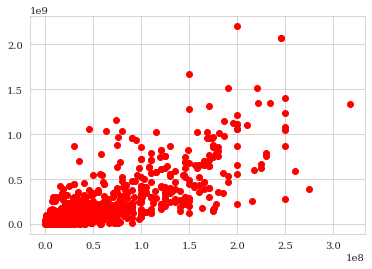

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid", {"font.family": ["serif"]})
plt.scatter(Xtrain1, y_train_val, color = "red")
#plt.plot(Xtest1, y_pred, color = "green")

plt.show()

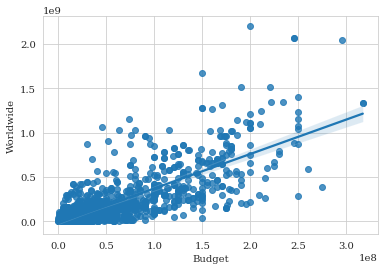

In [48]:
sns.regplot(x="Budget", y="Worldwide", data=dfs);

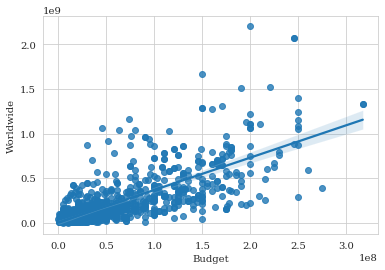

In [49]:
sns.regplot(x="Budget", y="Worldwide", data=df_newDN);